*1*.Data Loading

In [ ]:
!pip install statsmodels

Installs statsmodels library for statistical modeling like OLS regression with p-values and confidence intervals.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import datasets

In [ ]:
import pandas as pd
df = pd.read_csv("housing.csv")

In [ ]:
housing_df=df
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200


*2*.Feature Engineering

In [ ]:
#Rename the columns
housing_df.rename(columns={
    "median_income":"MedInc",
    "median_house_value":"Houseprice",
    "housing_median_age":"HouseAge",
    }, inplace=True)


In [ ]:
#After rename the columns
housing_df.head()

,longitude,latitude,HouseAge,total_rooms,total_bedrooms,population,households,MedInc,Houseprice
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200


In [ ]:
df[df["households"] == 0].shape

(0, 9)

In [ ]:
#Average occupation
# AvgOccupation = Population / Households
housing_df["AveOccup"] = housing_df["population"] / housing_df["households"]


In [ ]:
housing_df.head()

,longitude,latitude,HouseAge,total_rooms,total_bedrooms,population,households,MedInc,Houseprice,AveOccup
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,2.555556
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,2.109842
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,2.802260
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,2.547945
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,2.181467


In [ ]:
## Average rooms and bedrooms

# AvgRooms     = TotalRooms / Households
# AvgBedrooms  = TotalBedrooms / Households

housing_df["AveRooms"] = housing_df["total_rooms"] / housing_df["households"]
housing_df["AveBedrms"] = housing_df["total_bedrooms"] / housing_df["households"]

In [ ]:
# Drop old columns
housing_df.drop(columns=["households","total_rooms","total_bedrooms"], inplace=True)
housing_df.head()

,longitude,latitude,HouseAge,population,MedInc,Houseprice,AveOccup,AveRooms,AveBedrms
0,-122.23,37.88,41,322,8.3252,452600,2.555556,6.984127,1.023810
1,-122.22,37.86,21,2401,8.3014,358500,2.109842,6.238137,0.971880
2,-122.24,37.85,52,496,7.2574,352100,2.802260,8.288136,1.073446
3,-122.25,37.85,52,558,5.6431,341300,2.547945,5.817352,1.073059
4,-122.25,37.85,52,565,3.8462,342200,2.181467,6.281853,1.081081


In [ ]:
# NewPrice = OldPrice / 100000
# scaling house price from dollars to lakhs (or ×10⁵ units).
housing_df["Houseprice"] = housing_df["Houseprice"] / 100000
housing_df.head()

,longitude,latitude,HouseAge,population,MedInc,Houseprice,AveOccup,AveRooms,AveBedrms
0,-122.23,37.88,41,322,8.3252,4.526,2.555556,6.984127,1.023810
1,-122.22,37.86,21,2401,8.3014,3.585,2.109842,6.238137,0.971880
2,-122.24,37.85,52,496,7.2574,3.521,2.802260,8.288136,1.073446
3,-122.25,37.85,52,558,5.6431,3.413,2.547945,5.817352,1.073059
4,-122.25,37.85,52,565,3.8462,3.422,2.181467,6.281853,1.081081


Insights:

Renamed columns for clarity.

Created average-based features per household.

Scaled house price for easier modeling.

No zero-household rows found.

3.Exploratory Data Analysis(EDA)

In [ ]:
housing_df.describe()

,HouseAge,population,MedInc,Houseprice,AveOccup,AveRooms,AveBedrms
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,1425.476744,3.870671,2.068558,3.070655,5.429000,1.096579
std,12.585558,1132.462122,1.899822,1.153956,10.386050,2.474173,0.473735
min,1.000000,3.000000,0.499900,0.149990,0.692308,0.846154,0.333333
25%,18.000000,787.000000,2.563400,1.196000,2.429741,4.440716,1.006536
50%,29.000000,1166.000000,3.534800,1.797000,2.818116,5.229129,1.048889
75%,37.000000,1725.000000,4.743250,2.647250,3.282261,6.052381,1.098851
max,52.000000,35682.000000,15.000100,5.000010,1243.333333,141.909091,34.066667


In [ ]:
housing_df.isna().sum()

,0
longitude,0
latitude,0
HouseAge,0
population,0
MedInc,0
Houseprice,0
AveOccup,0
AveRooms,0
AveBedrms,207


In [ ]:
housing_df["AveBedrms"] = housing_df["AveBedrms"].fillna(
    housing_df["AveBedrms"].median())

In [ ]:
#After filling missing values
housing_df.isna().sum()

,0
longitude,0
latitude,0
HouseAge,0
population,0
MedInc,0
Houseprice,0
AveOccup,0
AveRooms,0
AveBedrms,0


Insights:

Most features have no missing values.

AveBedrms had missing values, handled using median imputation.

Dataset is now clean with no null values.

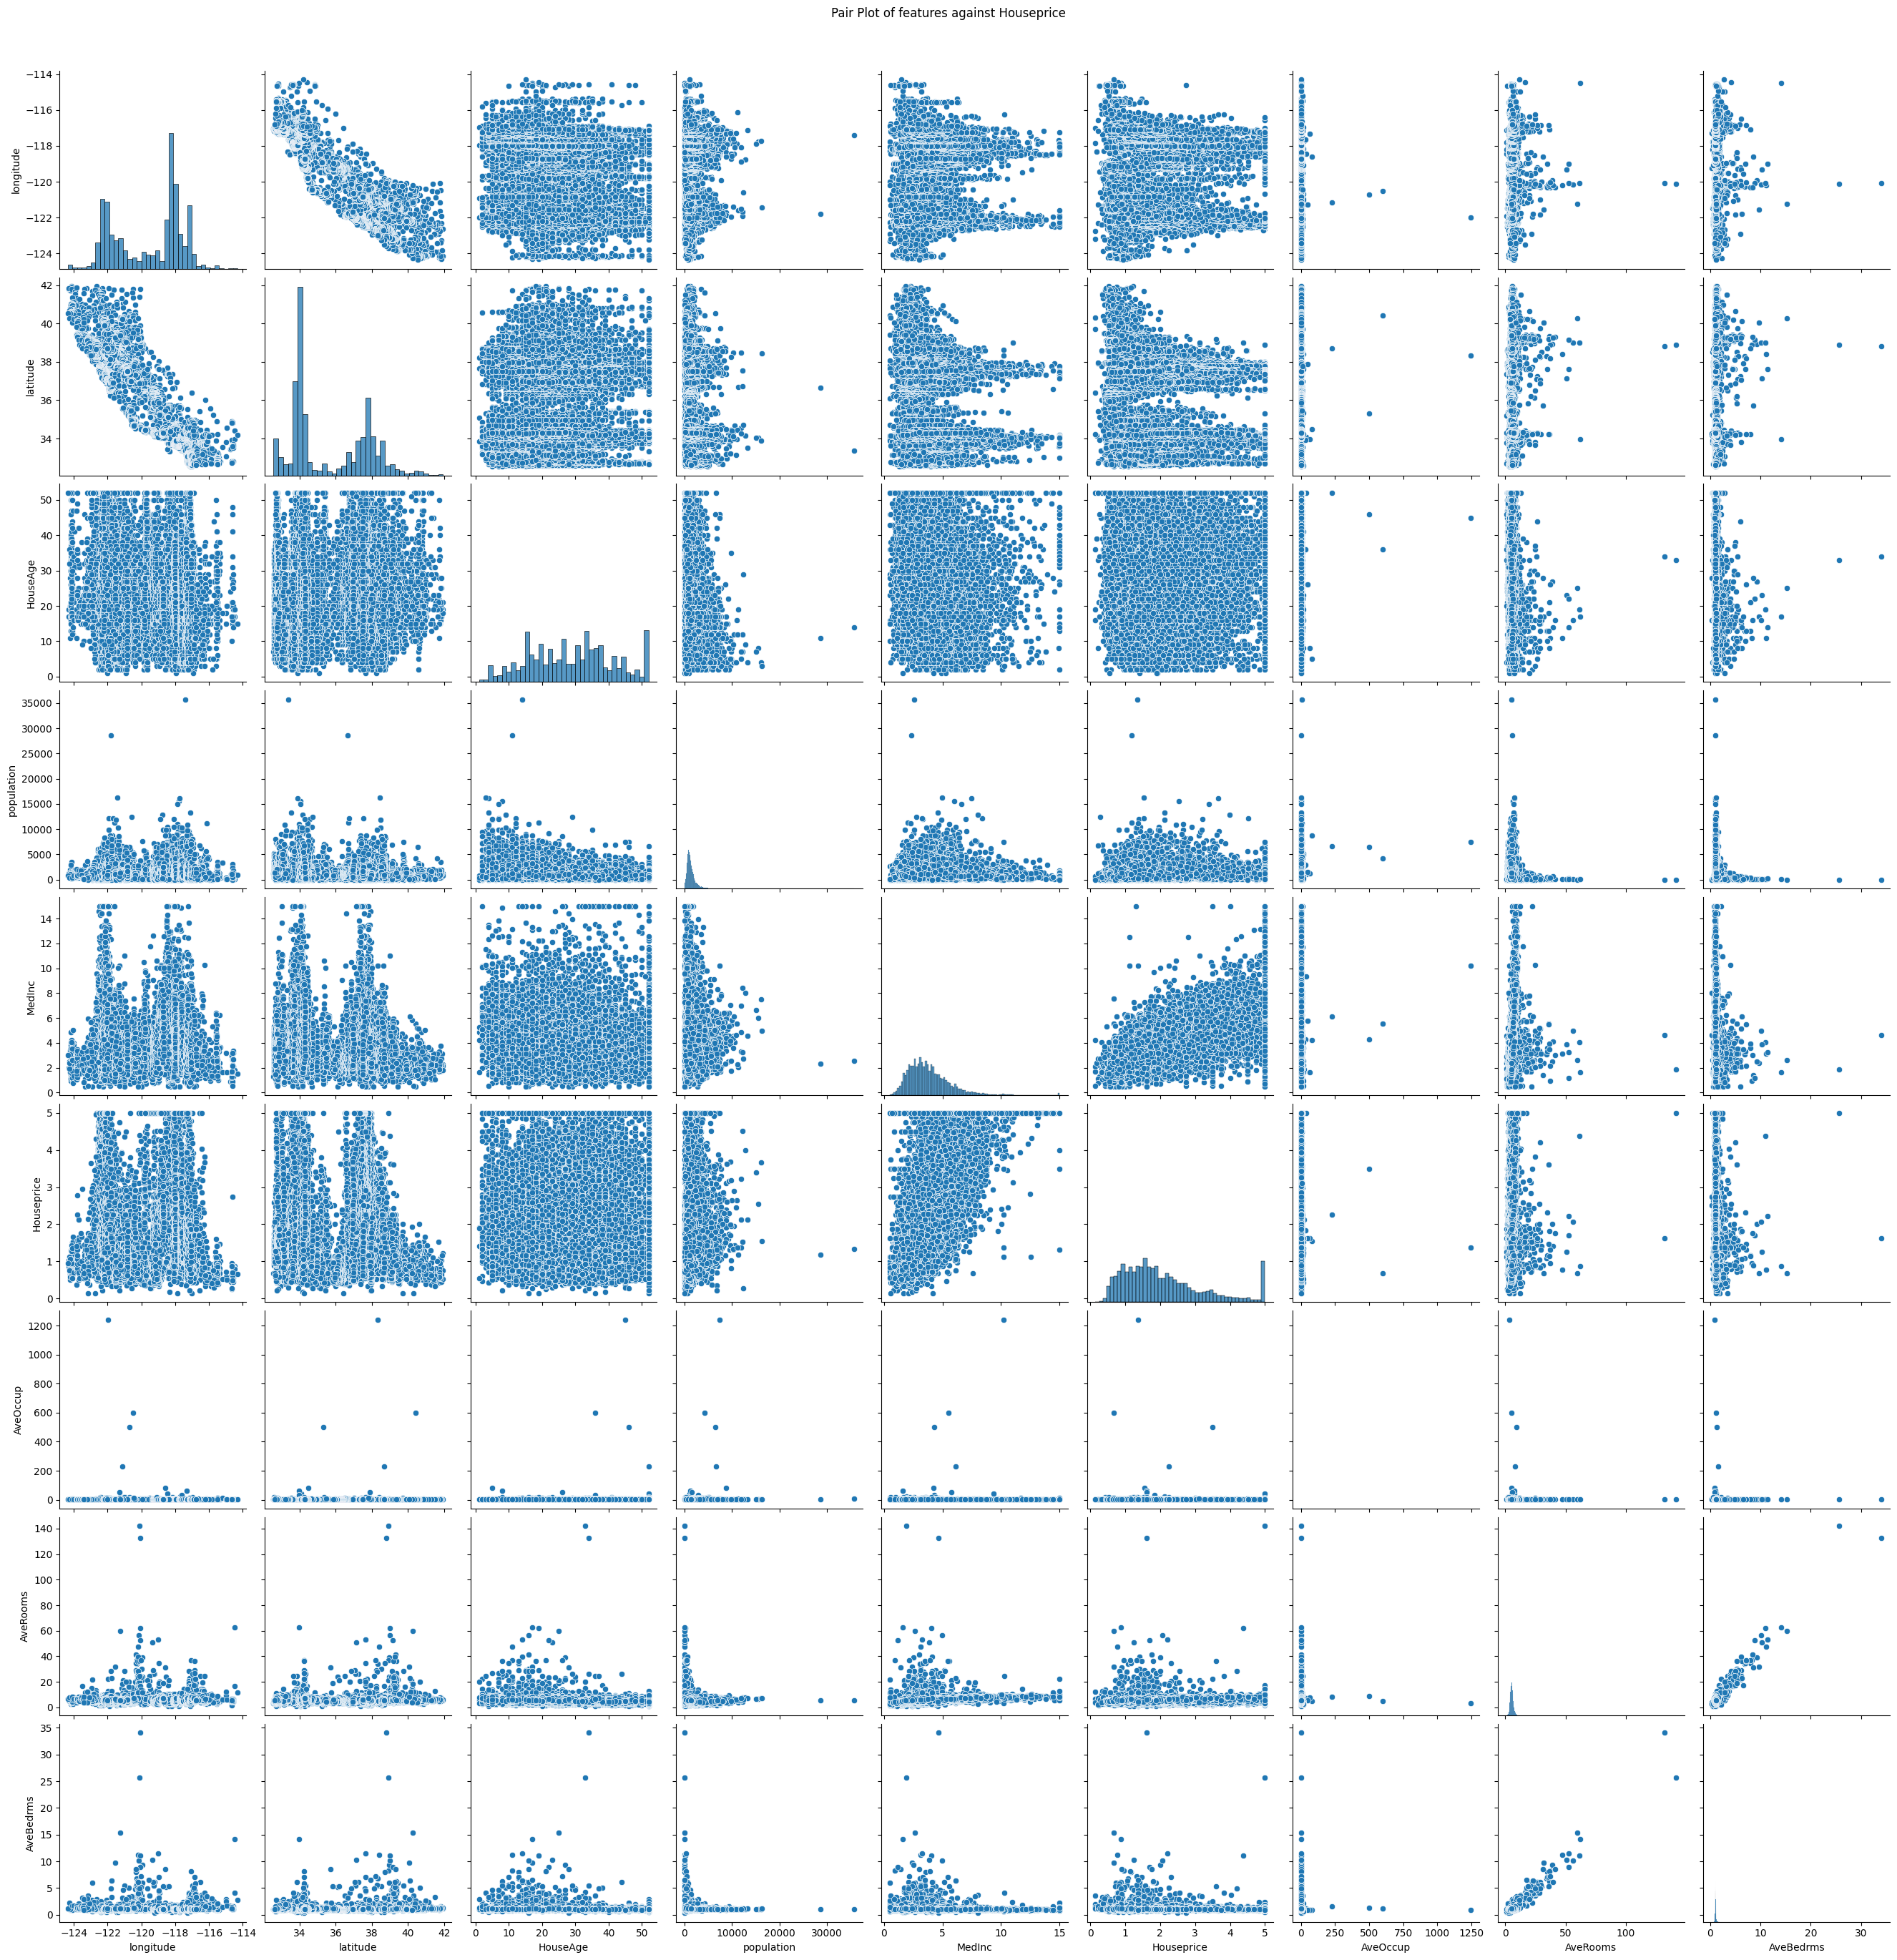

In [102]:
#Pair plot
sns.pairplot(housing_df, height=3)
plt.suptitle("Pair Plot of features against Houseprice", y=1.02)
plt.show()

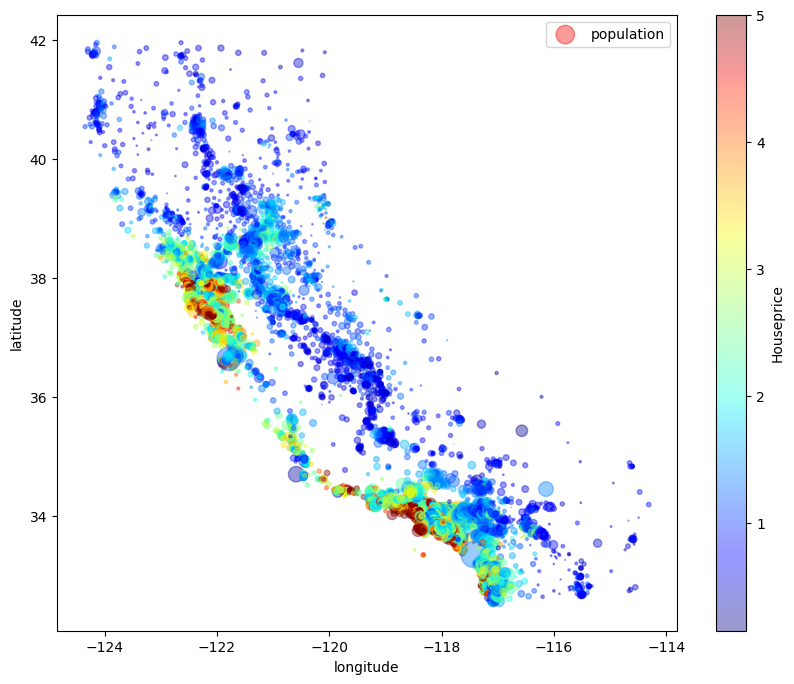

In [103]:
#Geographic scatter plot
housing_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,s=housing_df['population']/100, label="population", figsize=(10,8), c="Houseprice", cmap=plt.get_cmap("jet"), colorbar=True)
plt.show()

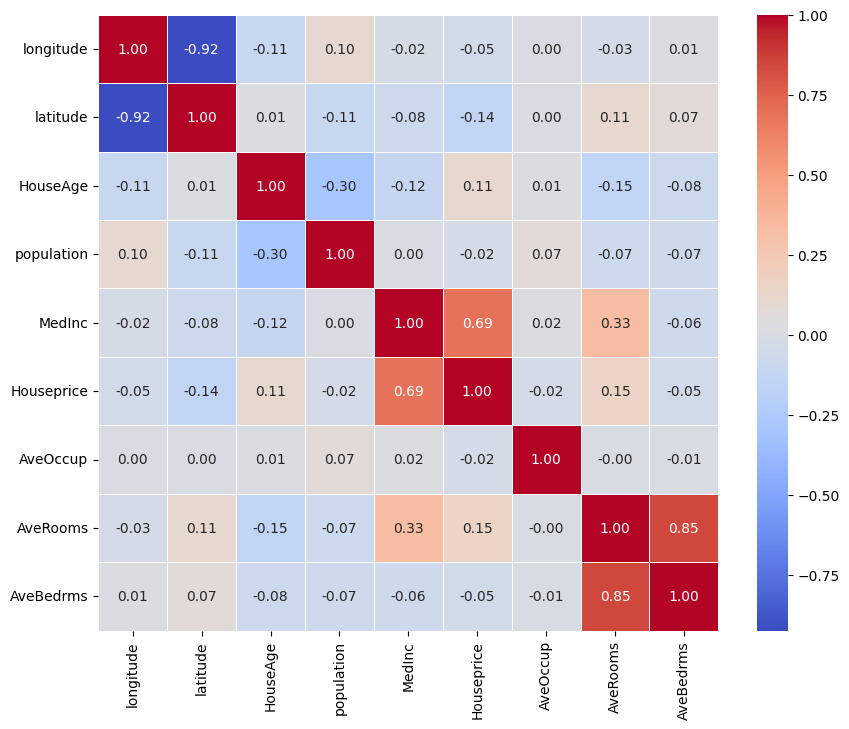

In [104]:
#Correlation heatmap
corr=housing_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f',linewidth=0.5)
plt.show()

In [105]:
# Rank features by correlation
corr["Houseprice"].abs().sort_values(ascending=False)

,Houseprice
Houseprice,1.000000
MedInc,0.688075
AveRooms,0.151948
latitude,0.144160
HouseAge,0.105623
AveBedrms,0.046511
longitude,0.045967
population,0.024650
AveOccup,0.023737


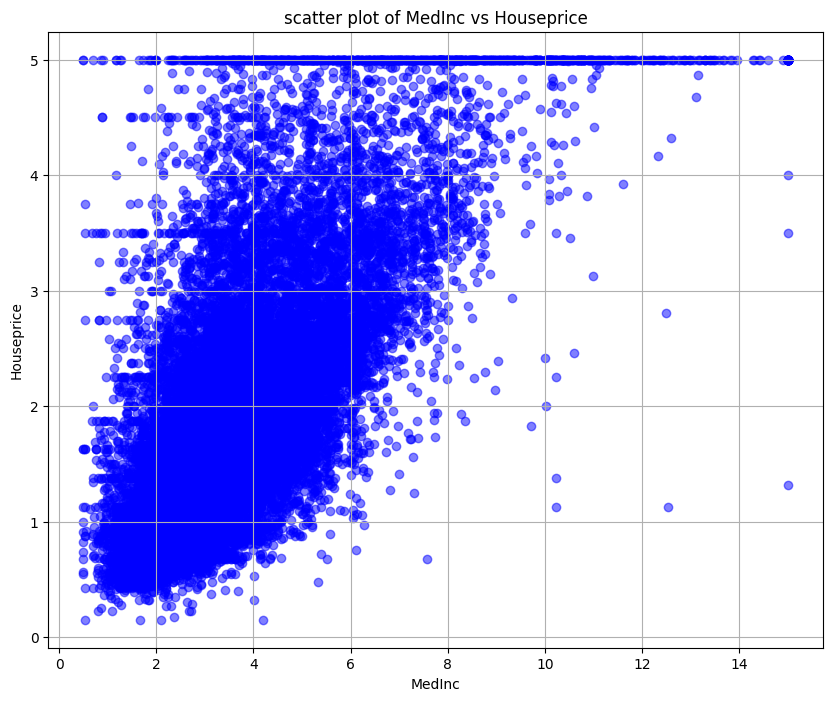

In [106]:
# Scatter plot (MedInc vs Houseprice)
medinc=housing_df["MedInc"]
houseprice=housing_df["Houseprice"]

plt.figure(figsize=(10,8))
plt.scatter(medinc,houseprice,alpha=0.5,color="blue")
plt.title("scatter plot of MedInc vs Houseprice")
plt.xlabel("MedInc")
plt.ylabel("Houseprice")
plt.grid(True)
plt.show()

insights:

MedInc shows a strong positive relationship with Houseprice.

Geographic plot indicates higher house prices in specific regions.

Most other features have weak to moderate correlation with house price.

4.Multicollinearity Check

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

housing_df_vif=housing_df.drop('Houseprice',axis=1)
housing_df_vif=housing_df_vif.apply(pd.to_numeric,errors='coerce')

vif_data=pd.DataFrame()
vif_data["feature"]=housing_df_vif.columns
vif_data["VIF"]=[variance_inflation_factor(housing_df_vif.values,i) for i in range(len(housing_df_vif.columns))]
print(vif_data)

      feature         VIF
0   longitude  633.487455
1    latitude  559.742653
2    HouseAge    7.196039
3  population    2.935734
4      MedInc   11.485603
5    AveOccup    1.095243
6    AveRooms   45.831179
7   AveBedrms   43.455933


In [108]:
housing_df=housing_df.drop(["longitude","latitude"],axis=1)

Insights:

Longitude and latitude show extremely high multicollinearity.

AveRooms and AveBedrms also have high VIF values.

Longitude and latitude were removed to reduce multicollinearity

5.Baseline Model Building (OLS) – Before Outlier Handling:

In [109]:
cols_to_covert=["MedInc","AveOccup","AveRooms","AveBedrms","population","HouseAge"]
housing_df[cols_to_covert]=housing_df[cols_to_covert].apply(pd.to_numeric,errors='coerce')
housing_df['Houseprice']=pd.to_numeric(housing_df['Houseprice'],errors='coerce')

X=sm.add_constant(housing_df.drop('Houseprice',axis=1))
y=housing_df['Houseprice']

model=sm.OLS(y,X).fit()

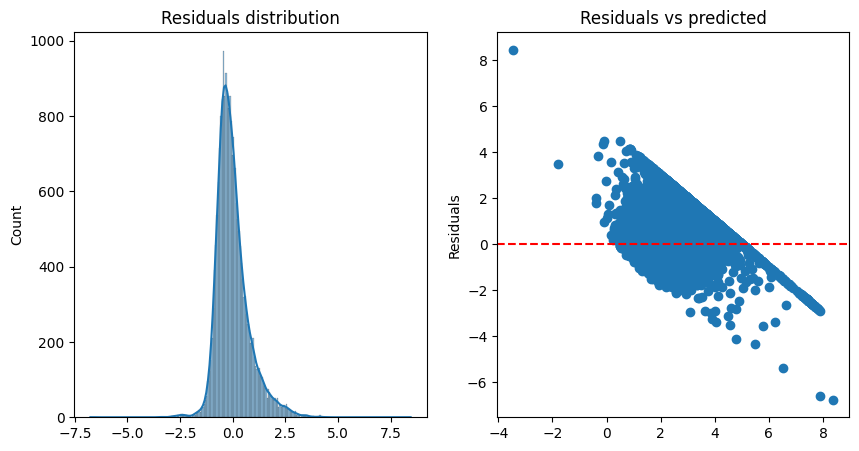

Model coefficients:
 const        -0.438597
HouseAge      0.016502
population    0.000022
MedInc        0.536666
AveOccup     -0.004877
AveRooms     -0.211302
AveBedrms     0.992041
dtype: float64


In [110]:
# Residual analysis

residuals=model.resid

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(residuals,kde=True)
plt.title("Residuals distribution")

plt.subplot(1,2,2)
plt.scatter(model.predict(X),residuals)
plt.axhline(y=0,color='r',linestyle='--')
plt.ylabel("Residuals")
plt.title("Residuals vs predicted")
plt.show()

print("Model coefficients:\n",model.params)

MedInc has the strongest positive impact on house price.

Residuals show non-ideal spread, indicating possible outliers.

Model coefficients provide initial understanding of feature influence.

6.Baseline Model Evaluation – Before Outlier Handling



In [111]:
from sklearn.metrics import mean_squared_error,r2_score

predictions=model.predict(X)

print("R square  Score:",r2_score(y,predictions))
print("MSE:",mean_squared_error(y,predictions))



R square  Score: 0.5396778674315161
MSE: 0.6129420737558622


Insights:

Baseline model explains about 54% of the variance.

Error is relatively high, suggesting room for improvement.

Motivates applying outlier handling to improve performance.

7.Outlier Detection and Treatment

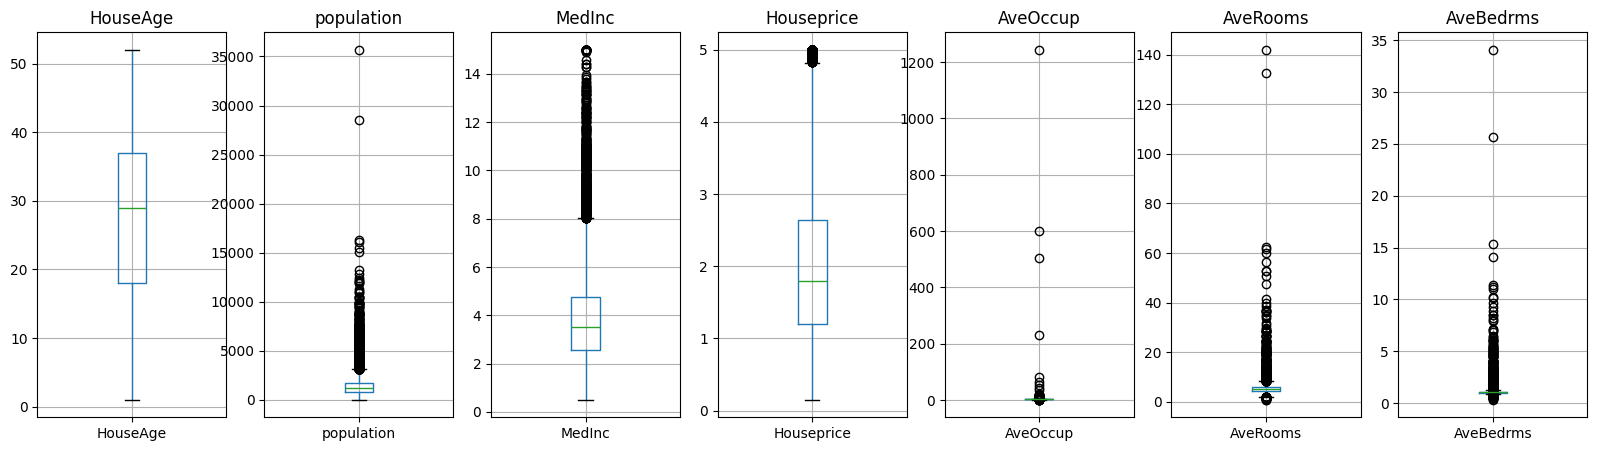

In [112]:
import matplotlib.pyplot as plt

def plot_boxplots(df):

   fig,axes=plt.subplots(1,len(df.columns),figsize=(20,5))


   for i,column_name in enumerate(df.columns):
       df.boxplot(column=column_name,ax=axes[i])
       axes[i].set_title(column_name)

   plt.show()

plot_boxplots(housing_df)

In [113]:
from numpy._core.defchararray import lower
def remove_outliers(df):
  df_no_outliers=df.copy()

  for column_name in df.columns:
    Q1=df[column_name].quantile(0.25)
    Q3=df[column_name].quantile(0.75)
    IQR=Q3-Q1

    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR

    df_no_outliers[column_name]=df_no_outliers[column_name].apply(lambda x:lower_bound if x<lower_bound else upper_bound if x>upper_bound else x)

  return df_no_outliers

housing_df_new=remove_outliers(housing_df)

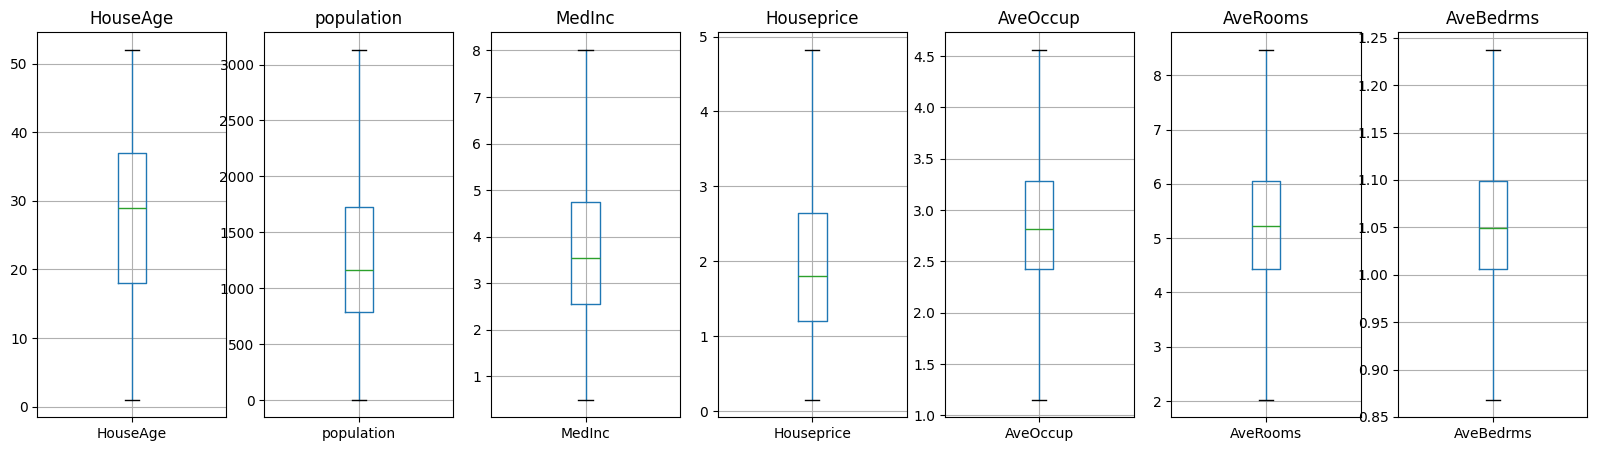

In [114]:
plot_boxplots(housing_df_new)

Insights:

Outliers were handled using the IQR method.

Extreme values were capped to reduce their influence.

This step aims to improve model stability and performance.

8.Model Building (OLS) – After Outlier Handling


In [115]:
cols_to_covert=["MedInc","AveOccup","AveRooms","AveBedrms","population","HouseAge"]
housing_df_new[cols_to_covert]=housing_df_new[cols_to_covert].apply(pd.to_numeric,errors='coerce')

housing_df_new['Houseprice']=pd.to_numeric(housing_df_new['Houseprice'],errors='coerce')

X=sm.add_constant(housing_df_new.drop('Houseprice',axis=1))
y=housing_df_new['Houseprice']

model=sm.OLS(y,X).fit()

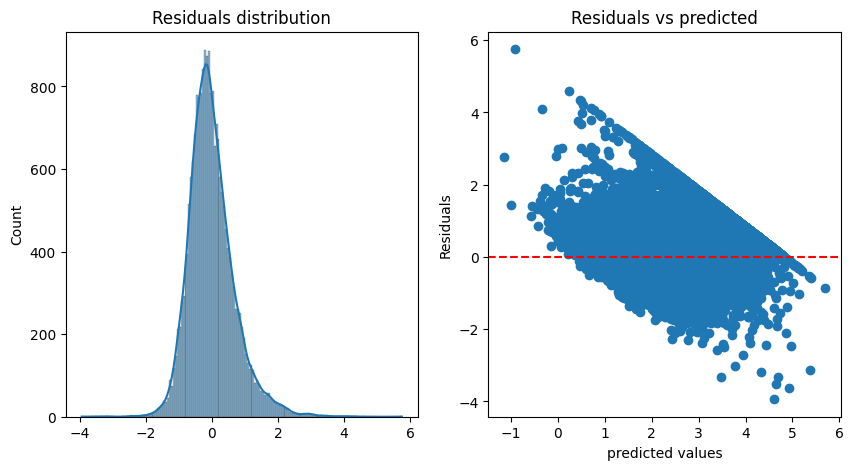

Model coefficien
 const        -1.029891
HouseAge      0.018688
population    0.000079
MedInc        0.633317
AveOccup     -0.357789
AveRooms     -0.257393
AveBedrms     2.310717
dtype: float64


In [116]:
residuals=model.resid

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(residuals,kde=True)
plt.title("Residuals distribution")

plt.subplot(1,2,2)
plt.scatter(model.predict(X),residuals)
plt.axhline(y=0,color='r',linestyle='--')
plt.ylabel("Residuals")
plt.xlabel("predicted values")
plt.title("Residuals vs predicted")
plt.show()


print("Model coefficien\n",model.params)

Insights:

Model coefficients changed after outlier treatment.

MedInc remains the strongest positive predictor.

Residual distribution looks more stable compared to the baseline model.

9.Model Evaluation – After Outlier Handling



In [118]:
from sklearn.metrics import mean_squared_error,r2_score

predictions=model.predict(X)

print("R square  Score:",r2_score(y,predictions))
print("MSE:",mean_squared_error(y,predictions))

R square  Score: 0.6174510918855844
MSE: 0.49033387396610495


Insights:

R² improved from 0.54 → 0.62 after outlier handling.

MSE reduced significantly, indicating better predictions.

Final model performs better than the baseline.

10.Model Validation on Test Data

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = sm.OLS(y_train, X_train).fit()
pred_test = model.predict(X_test)

print("Test R²:", r2_score(y_test, pred_test))
print("Test MSE:", mean_squared_error(y_test, pred_test))

Test R²: 0.593318815300435
Test MSE: 0.5141898554145827


Test R² is close to training R², indicating good generalization.

No major overfitting observed.

Model performance is stable on unseen data.

---

